In [1]:
# to get 3d plot to be rotatable (optional)
%matplotlib widget

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [ ]:
# initialize values
dt = 0.5
x = 0
# v = 0.5
# k = 0.01
# lam = .03         # lambda
# D = .7            # diffusion coefficient

# to initialize random:
v, k, lam, D = [random.uniform(0,1) for _ in range(4)]
print("v:",v, "k:", k, "lam:", lam, "D:", D )

x_list = [x]
v_list = [v]

v: 0.46249945556469874 k: 0.7418207600470033 lam: 0.24181026065930888 D: 0.2999821926243965


In [19]:
# update values
n = 30 # number of time steps

for _ in range(n):
    dW = random.uniform(0,1)
    v = v - (k*x + lam*v)*dt + D*dW
    x = x + v*dt

    x_list.append(x)
    v_list.append(v)

In [20]:
v, x

(0.07975094193511897, 0.3723893220582327)

In [21]:
# reservoir
# initialize values
W = random.uniform(0,1)
u = random.uniform(0,1)
h = 0

h_list = [h]

for _ in range(n):
    h = h + np.tanh(W*h + u*x)*dt
    h_list.append(h)

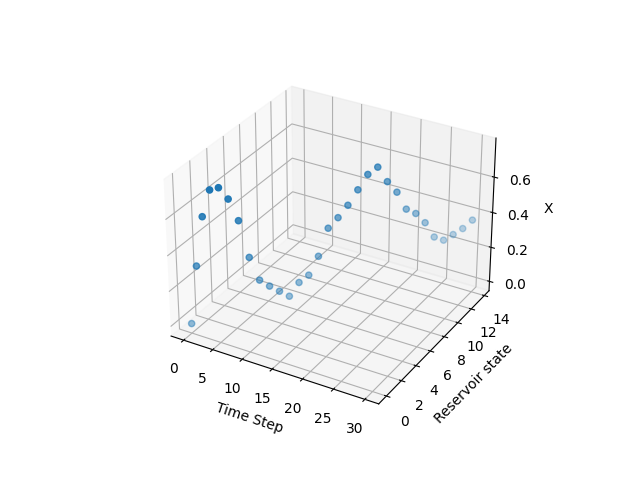

In [22]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = range(len(h_list))
y = h_list
z = x_list

ax.set_zlabel("X")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("Time Step")
ax.scatter(x_, y, z)

plt.show()